### Elvin Li

# Description 

Blackjack is a popular card game played in casinos around the world. It is typically played with one or more standard decks of 52 cards. The goal of the game is to beat the dealer by having a hand value as close to 21 as possible, without exceeding this number.

### Goal
The primary aim of this is to delve into the underlying mechanics of various blackjack strategies, scrutinizing their efficacy and robustness in overcoming one of the most popular and challenging casino games. By analyzing these strategies, the study seeks to unravel the mathematical and probabilistic foundations that make them effective.

### Basic Rules

- Cards are valued as follows: numbers 2-10 are worth their face value, face cards (Kings, Queens, Jacks) are worth 10, and Aces can be worth 1 or 11.
- Each player is dealt two cards, and the dealer is dealt one card face up and one card face down.
- Players can choose to "hit" (take another card) or "stand" (keep their current total). They may also have options to "double down" or "split" pairs into separate hands.
- If a player's total exceeds 21, they "bust" and lose their bet.
- The dealer must hit until their hand totals 17 or higher.
- If a player's hand is closer to 21 than the dealer's hand without busting, they win their bet. If the dealer busts, all remaining players win.
- Depending on the casino, some rules may vary, such as limiting the player's ability to split or double, or combing multiple decks to reduce player edge. For the purposes of this experiment, I will define the rules to be a 3:2 payout for Blackjack hand, 1 deck in the shoe, dealer stands on 17, and the player can split on any hand. Furthermore, the player has a base bet of 10 dollars, and plays 500 rounds on each simulation

### Implementing the Game Using Classes and Objects

To simulate the complexities of Blackjack, various classes and objects were created that cover all possible rules in the game. This allowed for easy implementation for how the game is played, as well as allow seamless integration of strategies.
- Classes like Card, Hand, Deck, Player, and CardCounter were designed to replicate the components and actions within a real Blackjack game.
- Methods within these classes enabled actions such as shuffling the deck, dealing cards, calculating scores, managing bets, and so on.

### The Strategies

Through decades of work by renowned mathematicians, card counting has been solidified as the most popular way to 'cheat' within Blackjack. First presented by Edward Thorp, a pioneer in probability theory and hedge fund manager, the Hi-Lo counting strategy has been utilized to keep a mental intuition of how many 'high-valued' or 'low-valued' cards are left in the deck. In addition to 'basic strategy', which is a chart that defines a player action for every possible hand combination assuming the running count is 0, and 'deviations', which defines player action for every possible hand combination for specific counts, we are able to test whether or not standard Blackjack is a beatable game. 

### Methodology

The methodology used employs a multi-faceted approach that incorporates object-oriented programming, statistical modeling, and data visualization to simulate and analyze the game of Blackjack. Doing so, this allowed the implementation of specific strategies such as Hi-Lo counting, basic strategy, and deviations based on the running count, enabling the perfect play of Blackjack.

As the simulated games progressed, the balance at each number of plays was systematically stored into a pandas dataframe. This structured data collection laid the groundwork for subsequent analysis and visualization.

The next step in the methodology involved creating an overlaid line plot to visually represent the movement of the balances. By running the simulation multiple times and observing the outcomes, a sample size significant enough for analytical purposes was generated. This repeated sampling and observation is consistent with the principles of the Monte Carlo method, applied here to approximate the gains from employing the various strategies.

To further delve into the data and extract meaningful insights, a linear regression model was constructed using the scikit-learn library. By creating a regression line through the data, the slope, or rate of change, was identified. This slope represents the change in balance as play is incremented and serves as an estimate of the expected value for a play. It provides a mathematical assessment of the effectiveness of the implemented strategies.

This multifaceted methodology, combining object-oriented programming for simulation, Monte Carlo methods for statistical sampling, and linear regression for trend analysis, offers a robust understanding of the potential gains in playing Blackjack using specific strategies. By connecting theoretical strategy with real-world application, this approach unveils valuable insights into the possibility of achieving consistent net profit in Blackjack.

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
class Card:
    """
    Represents a playing card.

    Attributes:
        value (str): The value of the card.

    Methods:
        get_value: Returns the integer value of the card.
        __str__: Returns the string representation of the card.
    """

    def __init__(self, value):
        """Initialize a Card object with a given value."""
        self.value = value

    def get_value(self):
        """Returns the integer value of the card."""
        if self.value in ['J', 'Q', 'K']:
            return 10
        elif self.value == 'A':
            return 1
        else:
            return int(self.value)
    def __str__(self):
        return f"{self.value}"

In [3]:
class Deck:
    """
    Represents a deck of playing cards.

    Attributes:
        cards (list): A list of Card objects.

    Methods:
        deal_card: Removes and returns a random card from the deck.
        show_deck: Returns a string representation of all the cards in the deck.
    """
    def __init__(self):
        """Initialize a Deck object with 52 shuffled cards."""
        self.cards = [Card(val) for val in ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']] * 4
        random.shuffle(self.cards)

    def deal_card(self):
        """Removes and returns the top card from the deck."""
        return self.cards.pop()

In [4]:
class Hand:
    """
    Represents a hand of playing cards.

    Attributes:
        cards (list): A list of Card objects.

    Methods:
        add_card: Adds a Card object to the hand.
        get_value: Returns the total value of the cards in the hand.
        is_soft_hand: Returns whether the hand is soft (contains an Ace counted as 11).
        __str__: Returns the string representation of the cards in the hand.
    """

    def __init__(self):
        """Initialize a Hand object with an empty list."""
        self.cards = []

    def add_card(self, card):
        """Adds a Card object to the hand."""
        self.cards.append(card)

    def get_value(self):
        """Returns the total value of the cards in the hand."""
        value = sum(card.get_value() for card in self.cards)
        aces = sum(1 for card in self.cards if card.value == 'A')
        if aces > 0 and value + 10 <= 21:
            value += 10
        return value
    
    def is_soft_hand(self):
        """Returns whether the hand is soft (contains an Ace counted as 11)."""
        value_without_ace = sum(card.get_value() for card in self.cards if card.value != 'A')
        aces_count = sum(1 for card in self.cards if card.value == 'A')
        return aces_count > 0 and (value_without_ace + aces_count * 11) <= 21
    
    def get_cards(self):
        """Returns a list of the string representations of the cards in the hand."""
        return [str(card) for card in self.cards]
    
    def __str__(self):
        return f"{self.value}"

In [5]:
class CardCounter:
    """
    Represents a card counter using different counting systems.

    Attributes:
        running_count (int): The current running count.

    Methods:
        high_low: Updates the count using the Hi-Lo system.
        halves: Updates the count using the Halves system.
        zen: Updates the count using the Zen system.
        get_running_count: Returns the current running count.
        reset_count: Resets the running count to 0.
    """

    def __init__(self):
        """Initialize a CardCounter object with a running count of 0."""
        self.running_count = 0

    def high_low(self, card):
        """Updates the count using the Hi-Lo system."""
        value = card.get_value()
        if card.value == 'A':
            self.running_count -= 1
        elif value in [2, 3, 4, 5, 6]:
            self.running_count += 1
        elif value in [10]: # '10', 'J', 'Q', 'K'
            self.running_count -= 1

    def halves(self, card):
        """Updates the count using the Halves system."""
        if card.value == '2':
            self.running_count += 0.5
        elif card.value in ['3', '4', '6']:
            self.running_count += 1
        elif card.value == '5':
            self.running_count += 1.5
        elif card.value == '7':
            self.running_count += 0.5
        elif card.value == '9':
            self.running_count -= 0.5
        elif card.value in ['10', 'J', 'Q', 'K', 'A']:
            self.running_count -= 1

    def zen(self, card):
        """Updates the count using the Zen system."""
        if card.value in ['2', '3', '7']:
            self.running_count += 1
        elif card.value in ['4', '5', '6']:
            self.running_count += 2
        elif card.value in ['10', 'J', 'Q', 'K']:
            self.running_count -= 2
        elif card.value == 'A':
            self.running_count -= 1

    def get_running_count(self):
        """Returns the current running count."""
        return self.running_count

    def reset_count(self):
        """Resets the running count to 0."""
        self.running_count = 0

In [6]:
class Player:
    """
    Represents a player in the blackjack game.

    Attributes:
        bankroll (float): The current amount of money the player has.
        bet_size (float): The current bet size.

    Methods:
        place_bet: Places a bet and deducts the amount from the bankroll.
        win: Adds the bet amount to the bankroll.
        lose: No action required as the bet has already been placed.
        draw: Returns the bet to the bankroll.
        get_bankroll: Returns the current bankroll.
        set_bet_size: Sets the bet size for the next hand.
    """

    def __init__(self, starting_bankroll):
        """Initialize a Player object with a given bankroll."""
        self.bankroll = starting_bankroll
        self.bet_size = 0

    def place_bet(self, bet_size):
        """Places a bet and deducts the amount from the bankroll."""
        self.bet_size = bet_size
        self.bankroll -= bet_size

    def win(self):
        """Adds the bet amount to the bankroll."""
        self.bankroll += self.bet_size * 2
        
    def blackjack(self):
        self.bankroll += (self.bet_size * 2) + (self.bet_size * 3/2)

    def lose(self):
        """No action required as the bet has already been placed."""
        pass
    
    def split(self, bet_size):
        """Splits the current bet into two hands."""
        self.bankroll -= bet_size
        self.bet_size *= 2

    def draw(self):
        """Returns the bet to the bankroll."""
        self.bankroll += self.bet_size

    def get_bankroll(self):
        """Returns the current bankroll."""
        return self.bankroll

    def set_bet_size(self, bet_size):
        """Sets the bet size for the next hand."""
        self.bet_size = bet_size

In [7]:
def should_split(player_hand, dealer_up_card, count):
    """Returns True if the player should split the hand."""
    if len(player_hand.cards) != 2 or player_hand.cards[0].value != player_hand.cards[1].value:
        return False

    pair_value = player_hand.cards[0].value
    dealer_value = dealer_up_card.get_value()

    if pair_value == 'A':
        return True
    
    if pair_value in ['J', 'Q', 'K']:
        if (dealer_value == 6) and (count >= 4):
            return True
        if (dealer_value == 5) and (count >= 5):
            return True
        if (dealer_value == 4) and (count >= 6):
            return True
        return False
    
    if pair_value == '9':
        if dealer_up_card.value in ['7', '10', 'A']:
            return False
        return True
    
    if pair_value == '8':
        return True
    
    if pair_value in ['7', '3', '2']:
        if dealer_up_card.value in ['8', '9', '10', 'A']:
            return False
        return True
    
    if pair_value == '6':
        if dealer_up_card.value in ['7', '8', '9', '10', 'A']:
            return False
        return True
            
    if pair_value == '5':
        return False
    
    if pair_value == '4':
        if dealer_up_card.value in ['5', '6']:
            return True
        return False
    
    return False

def should_insurance(count):
    """Returns True or False on if one should surrender"""
    if count >= 3:
        return True
    return False

def should_surrender(player_hand, dealer_up_card, count):
    """Returns True or False on if one should surrender"""
    player_value = player_hand.get_value()
    dealer_value = dealer_up_card.get_value()
    
    if player_value == 17:
        if dealer_up_card.value == 'A':
            return True
    if player_value == 16:
        if dealer_up_card.value in ['10', 'A']:
            return True
        if dealer_up_card.value == '9':
            if count > 1:
                return True
        if dealer_up_card.value == '8':
            if count >= 4:
                return True
        return False
    if player_value == 15:
        if dealer_up_card.value == '9':
            if count >= 2:
                return True
        if dealer_up_card.value == '10':
            if count > 0:
                return True
        if dealer_up_card.value == 'A':
            if count < 1:
                return True
        return False


def split_hands(hand):
    """Splits a hand into two new hands."""
    new_hand1 = Hand()
    new_hand2 = Hand()
    new_hand1.add_card(hand.cards.pop(0))
    new_hand2.add_card(hand.cards.pop(0))
    return new_hand1, new_hand2


def hit_or_stand(player_hand, dealer_upcard, count):
    """
    Follows basic strategy chart integrated with illustrious 18, utilizes player and, dealer upcard, and the count to determine hit or stand

    Args:
        player_hand (Hand obj)
        dealer_upcard (Card Obj)
        count(int)

    Returns:
        boolean: True if we should hit, False to stand
    """

    player_value = player_hand.get_value()
    dealer_value = dealer_upcard.get_value()
    soft_hand = player_hand.is_soft_hand()

    # Checks soft hand cases (Ace is present)
    if soft_hand:
        # Hit combinations
        if '9' in player_hand.get_cards():
            return False
        
        if '8' in player_hand.get_cards():
            if (dealer_upcard.value == '4') and (count >= 3):
                return True
            elif (dealer_upcard.value in ['5', '6']) and (count >= 1):
                return True
            return False
        
        if '7' in player_hand.get_cards():
            return dealer_upcard.value not in ['7', '8']
        
        if '6' in player_hand.get_cards():
            return (dealer_upcard.value != '2') or (count < 1)
        return True

    # Cases when player value <= 11
    if player_value <= 11:
        if (player_value == 11) and (dealer_upcard.value == 'A') and (count >= 1):
            return False
        if (player_value == 10) and (dealer_upcard.value in ['10', 'A']) and (count >= 4):
            return False
        if (player_value == 9):
            if (dealer_upcard.value == '2') and count >= 1:
                return False
            if (dealer_upcard.value == '7') and count >= 3:
                return False
        if (player_value == 8) and (dealer_upcard.value == '6') and (count >= 2):
                return False
        return True
    
    # Special cases for 12-16
    if 12 <= player_value <= 16:
        
        if player_value == 12:        
            if dealer_upcard.value == '2' and count >= 3:
                return False
            if dealer_upcard.value == '3' and count >= 2:
                return False
            if dealer_upcard.value == '4' and count <= 0:
                return True
            if dealer_upcard.value in ['5', '6']:
                return False
            return True
        
        if player_value == 13:
            if dealer_upcard.value == '2' and count <= 1:
                return True
            if dealer_upcard.value in ['3','4','5','6']:
                return False
            return True
        
        if player_value == 14:
            if dealer_upcard.value in ['2','3','4','5','6']:
                return False
            return True
        
        if player_value == 15:
            if dealer_upcard.value in ['2','3','4','5','6']:
                return False
            else:
                if (dealer_upcard.value == '10') and (count >= 4):
                    return False
                return True
        
        if player_value == 16:
            if dealer_upcard.value in ['2','3','4','5','6']:
                return False
            else:
                if (dealer_upcard.value == '9') and (count >= 4):
                    return False
                if (dealer_upcard.value == '10') and (count >= 0):
                    return False
                return True
                    
    # Stand on 17+
    return False


def double_down(player_hand, dealer_upcard, count):
    player_value = player_hand.get_value()
    dealer_value = dealer_upcard.get_value()
    
    rules = [
        (10, 10, 3),
        (10, 10, 4),
        (9, 2, 1),
        (9, 7, 4)
    ]

    # Check rules
    for rule in rules:
        player_val, dealer_val, rule_count = rule
        if player_value == player_val and dealer_value == dealer_val and count >= rule_count:  # Compare count with rule_count
            return True
        
    # If no rule matches, return False to indicate no special action
    return False

In [8]:
def blackjack_simulator(num_plays, starting_bankroll, base_bet, counting_strategy):
    """
    Simulates a Blackjack game using the high low counting strategy. 
    Args:
        num_plays (int): number of plays for the simulation
        starting_bankroll (float): starting amount of money for the player
        base_bet (float): base bet size
    Returns:
        DataFrame: contains information with columns ['Win', 'Loss', 'Draw','Running Count', 'Play Count']
    """

    deck = Deck()
    counter = CardCounter()
    player = Player(starting_bankroll)
    
    counting_method = getattr(counter, counting_strategy)
    
    df = pd.DataFrame(columns=['Win', 'Loss', 'Draw', 'Running Count', 'Play Count', 'Player Hand Value', 'Dealer Hand Value', 'Balance', 'Splitted', 'Doubled', 'First Card', 'Second Card', 'Dealer Upcard', 'Blackjack'])

    i = 0
    while i < num_plays:
        
        # New hands each round
        player_hand = Hand()
        dealer_hand = Hand()

        # Check for deck exhaustion 
        if len(deck.cards) < 15: # Arbitrary threshold
            deck = Deck() 
            counter.reset_count()

        # Set bet size 
        bet_size = base_bet 
        player.place_bet(bet_size)

        # Initial Dealing, 2 cards each, assume only the dealer's first card is shown to the player
        for j in range(2):
            player_card = deck.deal_card()
            dealer_card = deck.deal_card()

            player_hand.add_card(player_card)
            dealer_hand.add_card(dealer_card)

            counting_method(player_card)
            if j == 0:
                counting_method(dealer_card)
        
        if should_split(player_hand, dealer_hand.cards[0], counter.get_running_count()) == True:
            # Place second bet
            player.place_bet(bet_size)
            
            hand1, hand2 = split_hands(player_hand)
            # Play both hands separately, adjusting bets and counts for each
            
            # Play the dealer's hand 
            while dealer_hand.get_value() < 17:
                dealer_hand.add_card(deck.deal_card())
            
            for split_hand in [hand1, hand2]:
                
                # Initialize our row for the dataframe
                row = [0] * 14
                
                # Double initializer
                double_bool = False
                
                # Place the bet for the split hand
                split_bet = bet_size
                player.set_bet_size(split_bet)

                if double_down(split_hand, dealer_hand.cards[0], counter.get_running_count()) == True:
                    player.place_bet(split_bet)
                    player.set_bet_size(split_bet * 2)
                    
                    double_bool = True
                    row[9] = 1
           
                # Hit or Stand for splitted hand
                split_hand.add_card(deck.deal_card())
                while split_hand.get_value() < 21:
                    action = hit_or_stand(split_hand, dealer_hand.cards[0], counter.get_running_count())
                    if action:
                        new_card = deck.deal_card()
                        split_hand.add_card(new_card)
                        counting_method(new_card)
                    else:
                        break
                
                # Determine win/loss/draw
                if split_hand.get_value() > 21:
                    player.lose()
                    row[1] += 1
                elif ((split_hand.cards[0].value == "A") and (split_hand.cards[1].value in ['10','K','Q','J'])) or ((split_hand.cards[0].value in ['10','K','Q','J']) and (split_hand.cards[1].value == "A")):
                    player.blackjack()
                    row[0] += 1
                    row[13] += 1
                elif dealer_hand.get_value() > 21 or split_hand.get_value() > dealer_hand.get_value():
                    player.win()
                    row[0] += 1

                elif split_hand.get_value() == dealer_hand.get_value():
                    player.draw()
                    row[2] += 1
                else:
                    player.lose()
                    row[1] += 1
                
                # Player's Cards
                row[10] = str(split_hand.cards[0])
                row[11] = str(split_hand.cards[1])
                
                # Dealer's Upcard
                row[12] = str(dealer_hand.cards[0])
                
                # Play Count
                row[4] = i + 1
                # Running Count
                row[3] = counter.get_running_count()
                # Player Hand
                row[5] = split_hand.get_value()
                # Dealer Hand
                row[6] = dealer_hand.get_value()
                # Balance
                row[7] = player.get_bankroll()
                # Splitted
                row[8] = 1
                # Append row to dataframe
                df.loc[len(df)] = row
                i += 1
        
        else:
            # Initialize our row for the dataframe
            row = [0] * 14
            # Double initializer
            double_bool = False
            
            # Double bet if applicable
            if double_down(player_hand, dealer_hand.cards[0], counter.get_running_count()) == True:
                player.place_bet(bet_size)
                player.set_bet_size(bet_size * 2)
                row[9] = 1
                double_bool = True
            
            # Deal one more card if doubled down
            if double_bool == True:
                double_new_card = deck.deal_card()
                player_hand.add_card(double_new_card)
                counting_method(double_new_card)
            
            # Hit or Stand
            while (player_hand.get_value() < 21) and (double_bool == False):
                action = hit_or_stand(player_hand, dealer_hand.cards[0], counter.get_running_count())
                if action:
                    new_card = deck.deal_card()
                    player_hand.add_card(new_card)
                    counting_method(new_card)
                else:
                    break
            
            # Dealer hits or stands
            while dealer_hand.get_value() < 17:
                dealer_hand.add_card(deck.deal_card())
            
            # Conditions
            if player_hand.get_value() > 21:
                player.lose()
                row[1] = 1
            elif (player_hand.get_value() == 21) and ((player_hand.cards[0].value == "A") and (player_hand.cards[1].value in ['10','K','Q','J'])) or ((player_hand.cards[0].value in ['10','K','Q','J']) and (player_hand.cards[1].value == "A")):
                player.blackjack()
                row[0] += 1
                row[13] += 1
            elif dealer_hand.get_value() > 21:
                player.win()
                row[0] = 1
            elif player_hand.get_value() > dealer_hand.get_value():
                player.win()
                row[0] = 1
            elif player_hand.get_value() == dealer_hand.get_value():
                player.draw()
                row[2] = 1
            else:
                player.lose()
                row[1] = 1
            
            # Player's Cards
            row[10] = str(player_hand.cards[0])
            row[11] = str(player_hand.cards[1])
            # Dealer's Upcard
            row[12] = str(dealer_hand.cards[0])
            
            # Play Count
            row[4] = i + 1
            # Running Count
            row[3] = counter.get_running_count()
            # Player Hand
            row[5] = player_hand.get_value()
            # Dealer Hand
            row[6] = dealer_hand.get_value()
            # Balance
            row[7] = player.get_bankroll()
            
            # Append row to dataframe
            df.loc[len(df)] = row

            i += 1
    
    return df

In [9]:
def blackjack_lineplot(num_plays, starting_bankroll, base_bet, repetitions, strategy):
    
    # Plotting configurations
    fig, ax = plt.subplots()
    
    # Setting size 
    fig.set_size_inches(10,4)

    # Labels
    ax.set_title(f"Number of Plays vs. ΔBalance, n = {repetitions}", color = 'Black')
    ax.set_xlabel("Number of Plays", color = 'Black')
    ax.set_ylabel("ΔBalance ($USD)", color = 'Black')

    # Create a DataFrame to hold the balances across all repetitions
    overall_df = pd.DataFrame(columns=['Play Count', 'Balance', 'Win', 'Loss', 'Draw'])

    for _ in range(repetitions):
        df = blackjack_simulator(num_plays, starting_bankroll, base_bet, strategy)
        ax.plot(df['Play Count'], df['Balance'], alpha=0.5)
        overall_df = pd.concat([overall_df, df[['Play Count', 'Balance', 'Win', 'Loss', 'Draw']]])

    return overall_df

def blackjack_barchart(df, num_plays, repetitions):
    
    wins_avg = df['Win'].sum() / repetitions
    losses_avg = df['Loss'].sum() / repetitions
    draws_avg = df['Draw'].sum() / repetitions

    categories = ['Wins', 'Losses', 'Draws']
    values = [wins_avg, losses_avg, draws_avg]

    # Plotting configurations
    fig, ax = plt.subplots()

    # Setting size 
    fig.set_size_inches(10,4)

    # Setting general colors and title
    ax.bar(categories, values, color='white', edgecolor='black')
    
    bars = ax.bar(categories, values, color='white', edgecolor='black')

    # Labels
    ax.set_title(f"Average results with {num_plays} plays, n = {repetitions}", color = 'Black')
    ax.set_ylabel("Frequency", color = 'Black')

    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(value, 2), 
                ha='center', va='bottom', color='red')
    

def blackjack_distribution(df, num_plays, repeats):
    data = df[df.get('Play Count') == num_plays]
    
    # Plotting configurations
    fig, ax = plt.subplots()

    # Setting size 
    fig.set_size_inches(10,4)

    # Setting general colors and title
    ax.hist(data['Balance'], bins=50, color='white', edgecolor='black')

    # Labels
    ax.set_title(f"Distribution of Ending Balances, n = {repeats}", color = 'white')
    ax.set_xlabel("Ending Balance ($USD)", color = 'Black')
    ax.set_ylabel("Frequency", color = 'Black')

    average_balance = data.get('Balance').mean()

    ax.axvline(x=average_balance, color='red', linestyle='--')
    
    # Displaying the average balance on the top left
    ax.text(0.05, 0.95, f'Average Balance: ${average_balance:.2f}', transform=ax.transAxes, 
            color='red', verticalalignment='top')


## Data Visualization

We run a Monte Carlo simulation on 'perfect' strategy using hi-lo. The overlaid line plot for the repetitions, the bar chart represent wins, losses, draws, and the histogram for representing the distribution are shown.

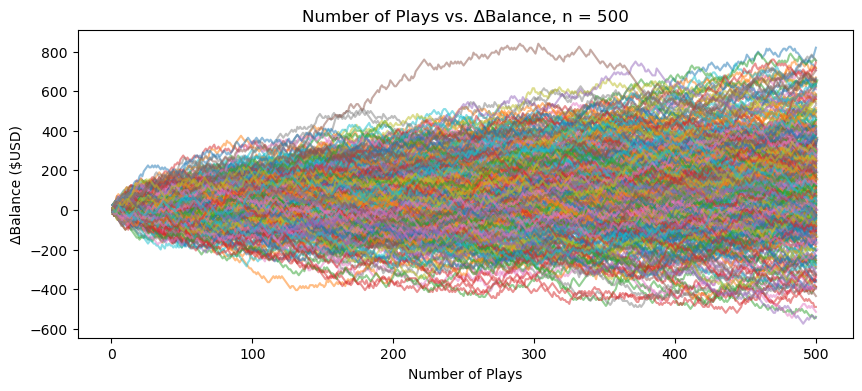

In [10]:
num_plays = 500
starting_bankroll = 0
base_bet = 10
repetitions = 500

df_hl = blackjack_lineplot(num_plays, starting_bankroll, base_bet, repetitions, "high_low")

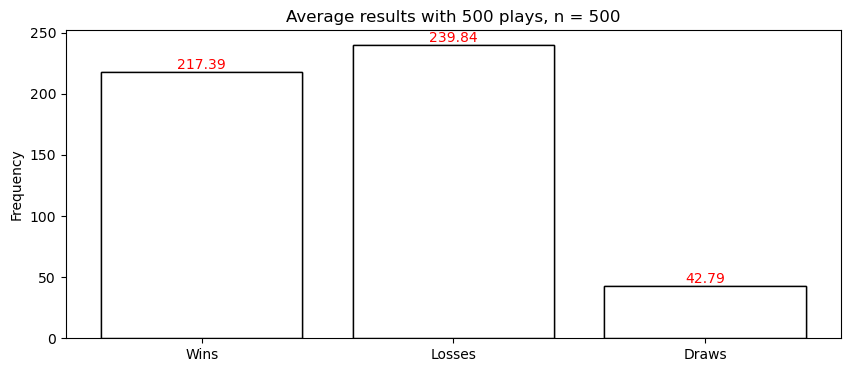

In [11]:
hl_bar = blackjack_barchart(df_hl, num_plays, repetitions)

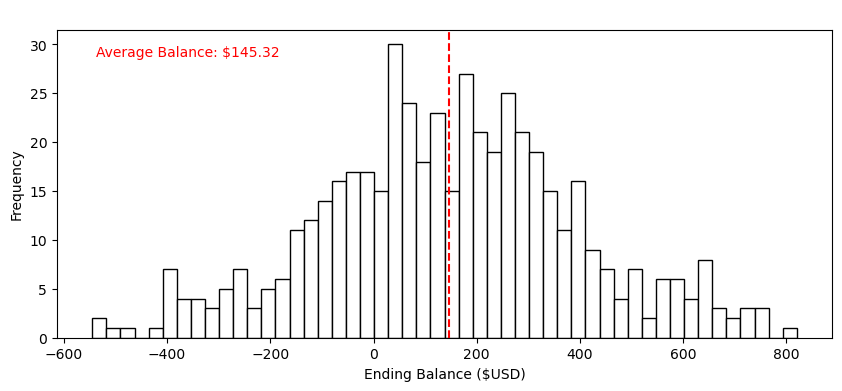

In [12]:
hl_dist = blackjack_distribution(df_hl, num_plays, repetitions)

## Predictive Modeling

We want to create a model that can predict expected returns at each number of plays. Examing the data, we notice a heteroscedastic, linear trend with a gaussian distribution. Due to heteroscedasticity, the assumptions for Ordinary Least Squares (OLS) regression is violated. To alleviate this issue, I chose to use Weighted Least Squares (WLS), which assigns less weight to observations with higher variance. Upon training and running the model, we can use it to predict the expected value after a certain amount of plays. Additionally, by observating the change in balance in terms of play count, we are able to estimate the change in balance for each play count. 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

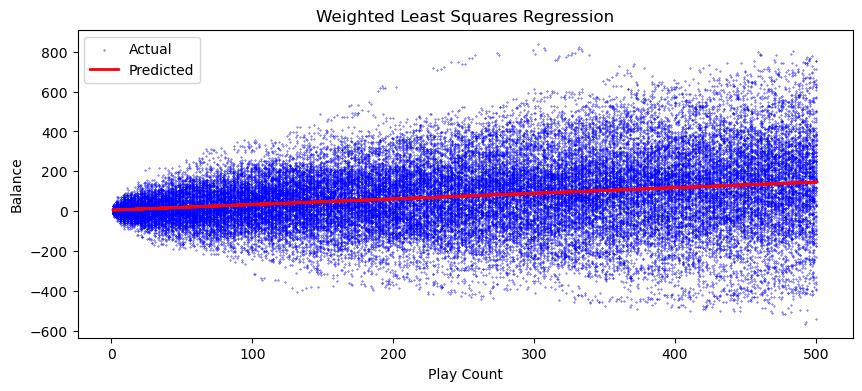

In [14]:
def regressor(df):
    
    X = df[['Play Count']].values
    y = df['Balance']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Assign weights as inverse of variance
    weights = 1 / (y_train.var())

    model = LinearRegression() 
    model.fit(X_train, y_train, sample_weight=weights)

    # Predict each x value
    y_pred = model.predict(X_test)

    # Plotting the results
    plt.figure(figsize=(10, 4))
    
    plt.scatter(X_test, y_test, color='blue', label='Actual', s=.1)
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel('Play Count')
    plt.ylabel('Balance')
    plt.title('Weighted Least Squares Regression')
    plt.legend()
    plt.show()

    return model

hl_model = regressor(df_hl)

In [15]:
print(f"The slope of the regression line is {hl_model.coef_[0]} with an intercept of {hl_model.intercept_}.")
print(f"This suggests that for every increase in play count, by following the 'perfect strategy' described will yield on \
average an increase in ${round(hl_model.coef_[0],2)} for each play count if the base bet is ${base_bet}. ")

The slope of the regression line is 0.2815872158834197 with an intercept of 5.053056431784938.
This suggests that for every increase in play count, by following the 'perfect strategy' described will yield on average an increase in $0.28 for each play count if the base bet is $10. 


#### Predictor

In [16]:
import ipywidgets as widgets

def on_button_click(b):
    input_value = int(text_box.value)  # Convert to integer
    prediction = round(model.predict([[input_value]])[0], 2)
    print(f"At {input_value} plays, you are on average expected to end with ${prediction}")

text_box = widgets.Text(description="Enter an integer: ", style={'description_width': 'initial'})
button = widgets.Button(description="Submit")
button.on_click(on_button_click)

display(text_box, button)

Text(value='', description='Enter an integer: ', style=DescriptionStyle(description_width='initial'))

Button(description='Submit', style=ButtonStyle())

#### Remarks
Notice that the player does not necessarily win more hands through this strategy. Rather, they win more in monetary terms. Through methodical splitting, doubling, and winning blackjack hands, the player is able to be net positive at the end. 

## A/B Testing

So far, I've been testing the hi-lo strategy exclusively, as it was the original counting strategy that sparked the debate for how one should play Blackjack 'perfectly'. However, as the years progressed, more counting strategies becomes available, such as the zen counting strategy, and the halves counting strategy. Using the same parameters and strategy for behavior based on the count, I want to see if there are any significant differences between changing counting strategies, and if any are better than the other.

## Generate the samples for Zen 

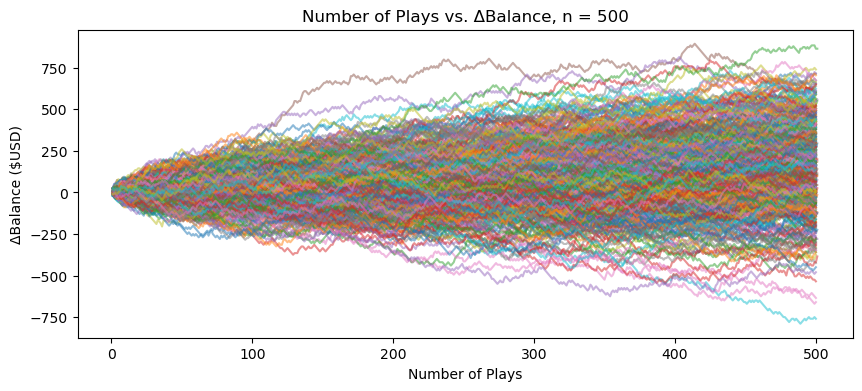

In [17]:
df_zen = blackjack_lineplot(num_plays, starting_bankroll, base_bet, repetitions, "zen") 

zen bar graph


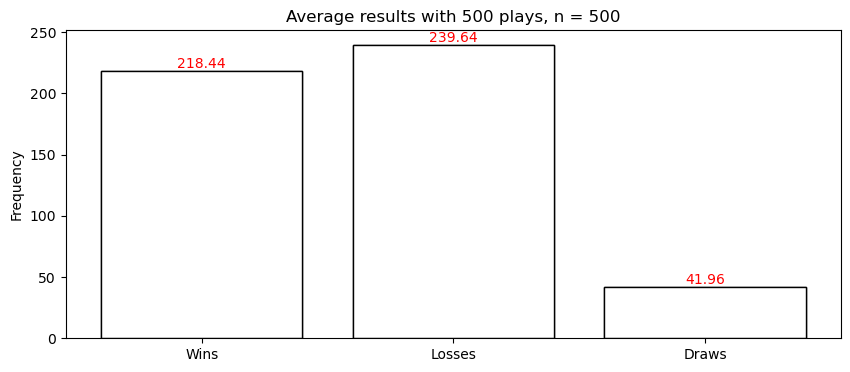

In [18]:
blackjack_barchart(df_zen, num_plays, repetitions)
print("zen bar graph")

zen distribution


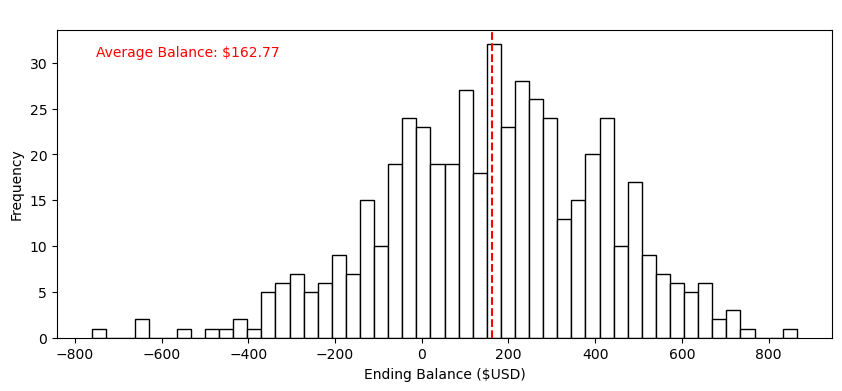

In [19]:
blackjack_distribution(df_zen, num_plays, repetitions)
print("zen distribution")

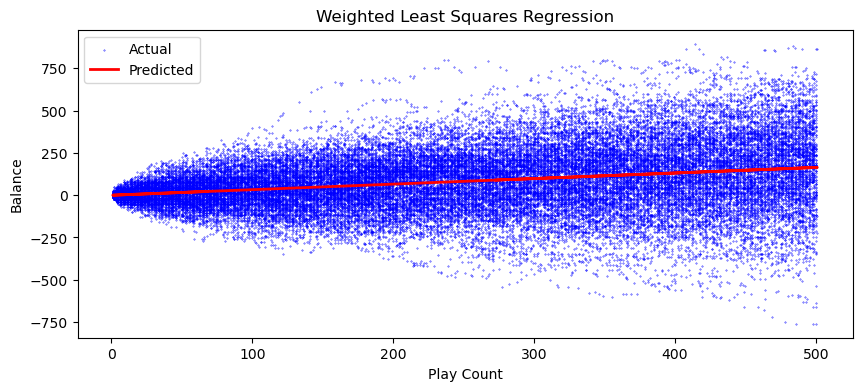

The slope of the zen regressor is 0.32864305169451785 with a slope of -0.553167179390087


In [20]:
zen_model = regressor(df_zen)
print(f"The slope of the zen regressor is {zen_model.coef_[0]} with a slope of {zen_model.intercept_}")

## Generate the samples for Halves

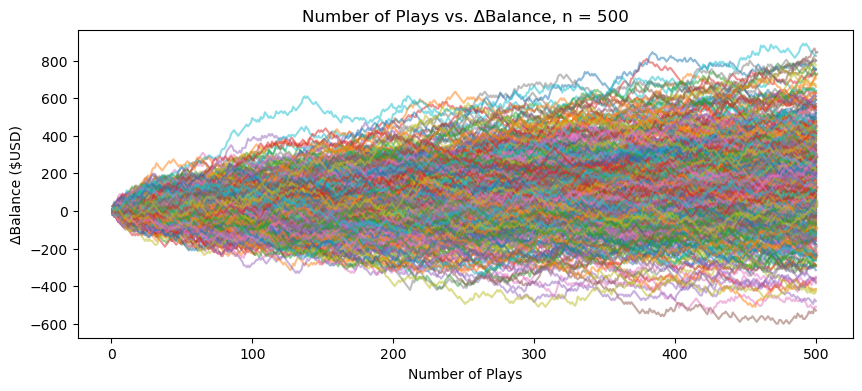

In [21]:
df_halves = blackjack_lineplot(num_plays, starting_bankroll, base_bet, repetitions, "halves") 

halves bar graph


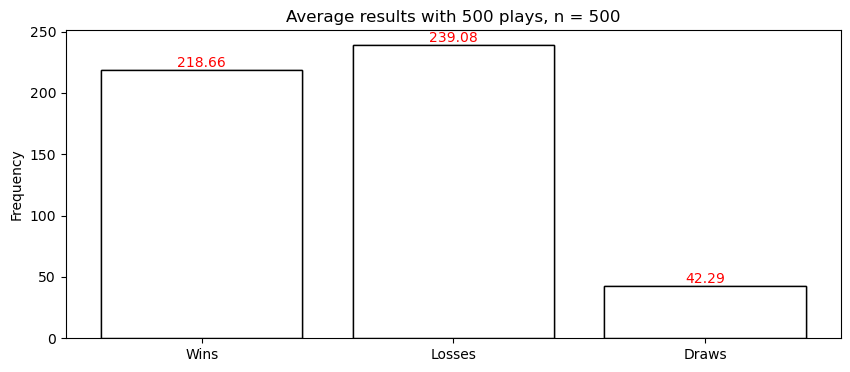

In [22]:
blackjack_barchart(df_halves, num_plays, repetitions)
print("halves bar graph")

halves distribution


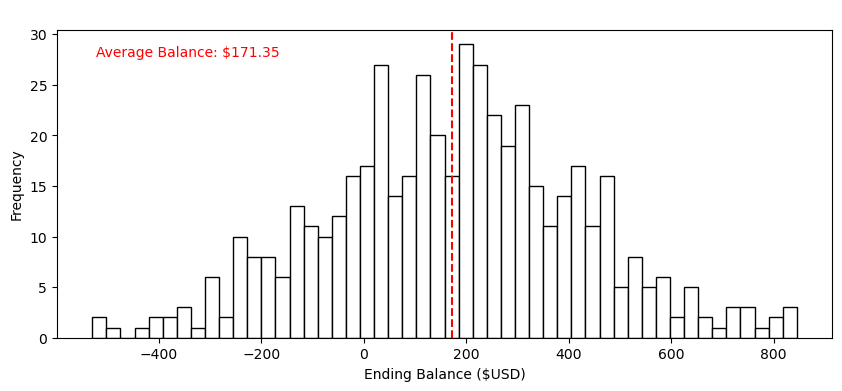

In [23]:
blackjack_distribution(df_halves, num_plays, repetitions)
print("halves distribution")

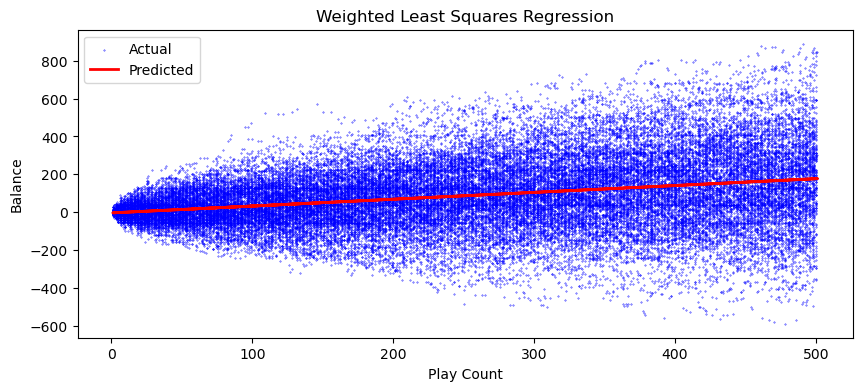

The slope of the zen regressor is 0.36161397517844157 with a slope of -4.231055034596594


In [24]:
halves_model = regressor(df_halves)
print(f"The slope of the zen regressor is {halves_model.coef_[0]} with a slope of {halves_model.intercept_}")

## Hi-Lo vs Zen

We will perform an independent samples (Welch's) t-test to compare the means of each strategy's ending balances, analyzing for any significant differences between their means. We use Welch's t-test because the variance cannot be determined to be the same. Just through visualizations of the distributions for each, it appears that the Zen strategy has a higher mean. We will test to see if this is significant.


**Null Hypothesis** $(H_0)$: $\mu_{\text{Zen}} = \mu_{\text{Hi-Lo}}$

**Alternative Hypothesis** $(H_a)$: $\mu_{\text{Zen}} > \mu_{\text{Hi-Lo}}$

In [34]:
zen_balances = np.array(df_zen[df_zen.get('Play Count') == num_plays].get('Balance'))
hl_balances = np.array(df_hl[df_hl.get('Play Count') == num_plays].get('Balance'))

In [35]:
# Compute sample means and standard deviations
mean_zen = np.mean(zen_balances)
mean_hl = np.mean(hl_balances)
std_zen = np.std(zen_balances, ddof=1)
std_hl = np.std(hl_balances, ddof=1)

# Compute standard error
n_zen = len(zen_balances)
n_hl = len(hl_balances)
SE = np.sqrt((std_zen**2 / n_zen) + (std_hl**2 / n_hl))

# Compute the t-statistic
t_statistic = (mean_zen - mean_hl) / SE

# Compute degrees of freedom for Welch's t-test
numerator = ((std_zen**2 / n_zen) + (std_hl**2 / n_hl))**2
denominator = (std_zen**4 / (n_zen**2 * (n_zen - 1))) + (std_hl**4 / (n_hl**2 * (n_hl - 1)))
df = numerator / denominator

print(f"t-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")

t-statistic: 1.0922384425499188
Degrees of Freedom: 997.7494137813522


We will use a significance level of $\alpha = 0.05$, representing a 5% chance of rejecting the null hypothesis. The associated critical t-value of this is around $1.645$, which is what we compare against the t-statistic.

In [39]:
if t_statistic > 1.645:
    print("Reject the null hypothesis. There's a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means detected.")

Fail to reject the null hypothesis. No significant difference between the means detected.


## Hi-Lo vs Halves

Once again, we will perform an independent samples t-test to compare the means of each strategy's ending balances. It appears that Halves has on average a higher mean, so lets test this significance.

**Null Hypothesis** $(H_0)$: $\mu_{\text{Halves}} = \mu_{\text{Hi-Lo}}$

**Alternative Hypothesis** $(H_a)$: $\mu_{\text{Halves}} > \mu_{\text{Hi-Lo}}$

In [40]:
halves_balances = np.array(df_halves[df_halves.get('Play Count') == num_plays].get('Balance'))

In [42]:
# Compute sample means and standard deviations
mean_halves = np.mean(halves_balances)
std_halves = np.std(halves_balances, ddof=1)

# Compute standard error
n_halves = len(halves_balances)
SE = np.sqrt((std_halves**2 / n_halves) + (std_hl**2 / n_hl))

# Compute the t-statistic
t_statistic = (mean_halves - mean_hl) / SE

# Compute degrees of freedom for Welch's t-test
numerator = ((std_halves**2 / n_halves) + (std_hl**2 / n_hl))**2
denominator = (std_halves**4 / (n_halves**2 * (n_halves - 1))) + (std_hl**4 / (n_hl**2 * (n_hl - 1)))
df = numerator / denominator

print(f"t-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")

t-statistic: 1.6442826402757864
Degrees of Freedom: 997.9944512172176


We will use a significance level of $\alpha = 0.05$, representing a 5% chance of rejecting the null hypothesis. The associated critical t-value of this is around $1.645$, which is what we compare against the t-statistic.

In [44]:
if t_statistic > 1.645:
    print("Reject the null hypothesis. There's a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means detected.")

Fail to reject the null hypothesis. No significant difference between the means detected.


## Zen vs Halves

Finally, let's test Zen against Halves. We will use the same methods. 

**Null Hypothesis** $(H_0)$: $\mu_{\text{Halves}} = \mu_{\text{Zen}}$

**Alternative Hypothesis** $(H_a)$: $\mu_{\text{Halves}} > \mu_{\text{Zen}}$

In [46]:
# Compute standard error
SE = np.sqrt((std_halves**2 / n_halves) + (std_zen**2 / n_zen))

# Compute the t-statistic
t_statistic = (mean_halves - mean_zen) / SE

# Compute degrees of freedom for Welch's t-test
numerator = ((std_halves**2 / n_halves) + (std_zen**2 / n_zen))**2
denominator = (std_halves**4 / (n_halves**2 * (n_halves - 1))) + (std_zen**4 / (n_zen**2 * (n_zen - 1)))
df = numerator / denominator

print(f"t-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")

t-statistic: 0.5376660568644065
Degrees of Freedom: 997.6693493301901


We will use a significance level of $\alpha = 0.05$, representing a 5% chance of rejecting the null hypothesis. The associated critical t-value of this is around $1.645$, which is what we compare against the t-statistic.

In [48]:
if t_statistic > 1.645:
    print("Reject the null hypothesis. There's a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. No significant difference between the means detected.")

Fail to reject the null hypothesis. No significant difference between the means detected.


# Remarks

Although the means appear different, through hypothesis testing of all the strategies' ending balances and means we can conclude that their difference can be left to chance rather than an improvement in strategy to a 95% confidence level. This isn't too surprising, as all strategies have been consistently used over time with none of them ever proved wrong. Hi-Lo still remains the king due to its age and popularity, though other counting strategies may affect the variance or other statistic through the course of a player's game.  